#Multiclass Image Classification

10 Class classification



In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-17 10:48:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   195MB/s    in 2.5s    

2023-04-17 10:48:42 (195 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in ' {dirpath}'.")

There are 2 directories and 0 images in ' 10_food_classes_all_data'.
There are 10 directories and 0 images in ' 10_food_classes_all_data/train'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in ' 10_food_classes_all_data/train/chi

In [4]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Apr 17 10:48 .
drwxr-xr-x  1 root root 4096 Apr 17 10:48 ..
drwxr-xr-x 12 root root 4096 Apr 17 10:48 test
drwxr-xr-x 12 root root 4096 Apr 17 10:48 train


In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [9]:
# lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [11]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory
  target_folder = target_dir+target_class
  # Fet a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:  {img.shape}") # Show the shape of the image
  return img


Image shape:  (512, 512, 3)


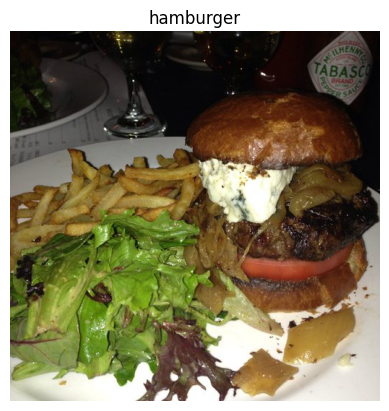

In [12]:
# Visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

In [24]:
#Setup pathc to our data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

# Preprocess the data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)
## Augmentef
train_data_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)




train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               seed = 42,
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             batch_size=42,
                                             target_size = (244,244),
                                             class_mode = "categorical",
                                             seed = 42)

## Train data augmented
train_data_augmented = train_data_augmented.flow_from_directory(directory = train_dir,
                                             batch_size=42,
                                             target_size = (244,244),
                                             class_mode = "categorical",
                                             seed = 42)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [46]:
# Build the model

model_1 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (244,244,3)),
    MaxPool2D(2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "softmax")

])

In [50]:
# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [51]:
# Fit the model
history_1 = model_1.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


InvalidArgumentError: ignored

In [14]:
# Create the model --> CNN 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Set seed
tf.random.set_seed(42)

# Setup paths to our data directories (two ways to do that)
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

# Preprocess data (get all the pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode="categorical",
                                               seed=42)

# 1.Build the model CNN
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="relu")                        

])


# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


'\n# 1.Build the model CNN\nmodel_1 = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(filters=10,\n                            kernel_size=3,\n                            activation="relu",\n                            input_shape=(224,224,3)),\n    tf.keras.layers.Conv2D(10,3,activation="relu"),\n    tf.keras.layers.MaxPool2D(pool_size=2,\n                              padding="valid"),\n    tf.keras.layers.Conv2D(10, 3, activation ="relu"),\n    tf.keras.layers.Conv2D(10,3,activation="relu"),\n    tf.keras.layers.MaxPool2D(2),    \n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(1, activation="relu")                        \n\n])\n\n\n# Compile our CNN\n\nmodel_1.compile(loss="binary_crossentropy",\n                optimizer=tf.keras.optimizers.Adam(),\n                metrics = ["accuracy"])\n\n\n# Fit the model\nhistory_1 = model_1.fit(train_data,\n                        epochs = 20,\n                        steps_per_epoch = len(train_data),\n                  

In [1]:

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
     





train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
    



# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)




# View a random image from the training dataset
import random




from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])




# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
     

--2023-04-18 09:09:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 172.253.119.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   130MB/s    in 4.2s    

2023-04-18 09:09:55 (119 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_al

In [2]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 2.9530 - accuracy: 0.2972


[2.9529571533203125, 0.2971999943256378]

#Saving and Loading the model

In [3]:
# Save the model
model_9.save("saved_trained_model_9")

In [4]:
# Load the model
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_9")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 2.9530 - accuracy: 0.2972


[2.952955961227417, 0.2971999943256378]